In [20]:
import pandas as pd
import random

def salida(a, b, x):
    ruido = random.uniform(-10, 10)
    return a + b * x + ruido

# relación entre muertes y experencia: Cada zombie matado aumenta 10 la experencia más un número aleatorio (ruido)
df = pd.DataFrame({
    "zombies_matados": [0, 1, 3, 7, 20],
    # "experiencia": [0, 10, 30, 70, 200]
})

df['experiencia'] = df.zombies_matados.apply(lambda x: salida(100, 10, x))

df

,zombies_matados,experiencia
0,0,109.883693
1,1,114.564545
2,3,139.719778
3,7,176.408122
4,20,294.841835


Text(0.5, 1.0, 'Relación experiencia/zombies matados')

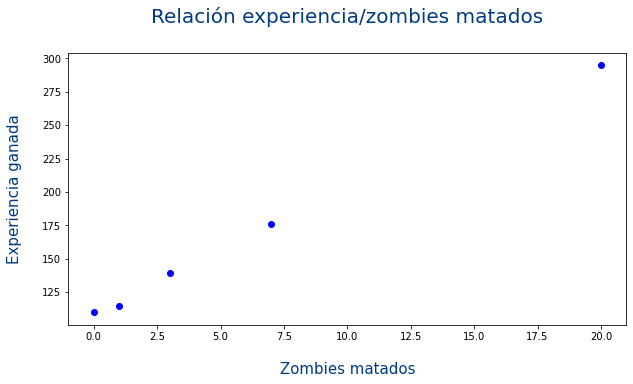

In [21]:
import matplotlib.pyplot as plt

figure=plt.figure(figsize=(10, 5))
axis = figure.add_subplot()
 
# Los datos que se muestran
axis.plot(df.zombies_matados, df.experiencia,"o",color="#0000FF")  
  
# Las etiquetas
axis.set_xlabel('Zombies matados', fontsize=15,labelpad=20,color="#003B80") 
axis.set_ylabel('Experiencia ganada', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Relación experiencia/zombies matados", fontsize=20,pad=30,color="#003B80")

Text(0.5, 1.0, 'Regresión lineal simple')

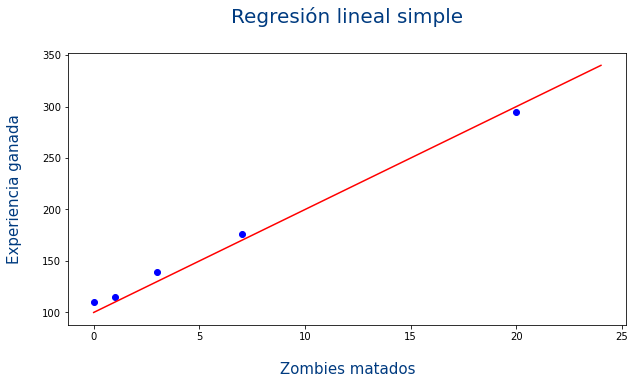

In [22]:
import numpy as np

def drawRect(a, b):
    return  a + b * x


x = np.arange(25)

figure=plt.figure(figsize=(10, 5))
axis = figure.add_subplot()
 
# Los datos que se muestran
axis.plot(df.zombies_matados, df.experiencia, "o", color="#0000FF")
axis.plot(x, drawRect(100, 10), color="#FF0000")
  
# Las etiquetas
axis.set_xlabel('Zombies matados', fontsize=15,labelpad=20,color="#003B80")  
axis.set_ylabel('Experiencia ganada', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Relación experiencia/zombies matados", fontsize=20,pad=30,color="#003B80")

Coeficientes: 
 [9.3171889]
Término independiente (corte de la recta en eje Y): 
 109.31702331757349
Error Cuadrático Medio (MCE): 5.41 pts²
Raiz Error Cuadrático Medio (RMCE): 2.33 pts


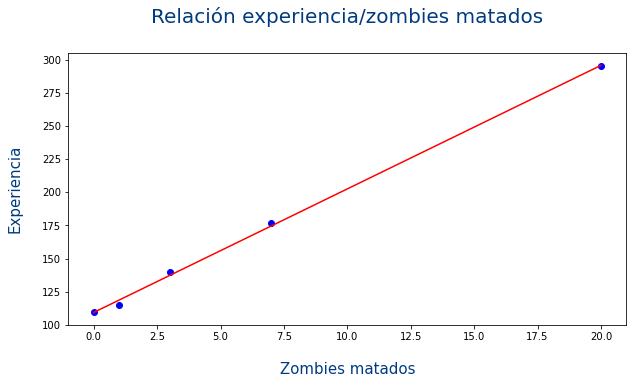

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

X = df.zombies_matados.values.reshape((-1, 1))
Y = df.experiencia.values

modelo = LinearRegression()

modelo.fit(X, Y)

# Veamos los coeficienetes obtenidos
print('Coeficientes: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término independiente (corte de la recta en eje Y): \n', modelo.intercept_)

figure=plt.figure(figsize=(10, 5))
axis = figure.add_subplot()

# Las etiquetas
axis.set_xlabel('Zombies matados', fontsize=15,labelpad=20,color="#003B80")  
axis.set_ylabel('Experiencia', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Relación experiencia/zombies matados", fontsize=20,pad=30,color="#003B80")

# X = df.Father
Y_predict = df.zombies_matados.apply(lambda x: modelo.predict(np.array(x).reshape(-1, 1)))

# Los datos que se muestran
axis.plot(X, Y,"o",color = "#0000FF", zorder = 1)
axis.plot(X, Y_predict, color = "#FF0000", zorder = 2)

# Error Cuadrado Medio
error_ECM = mean_squared_error(Y, Y_predict)
print("Error Cuadrático Medio (MCE): %.2f pts²" % error_ECM)
print("Raiz Error Cuadrático Medio (RMCE): %.2f pts" % np.sqrt(error_ECM))